In [5]:
import numpy as np
import pandas as pd
import os

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
for dirname, _, filenames in os.walk("C:\\Users\\HP\\Desktop\\Plant Specie Classification\\Technique 2\\Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\sample_submission.csv
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\test.csv
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\train.csv
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\10.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\100.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1000.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1001.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1002.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1003.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1004.jpg
C:\Users\HP\Desktop\Plant Specie Classification\Technique 2\Dataset\images\1005.jpg
C:\Us

In [9]:
os.mkdir('./Augumented Data')

In [11]:
os.mkdir('./Augumented Data/Train')
os.mkdir('./Augumented Data/Test')
os.mkdir('./Augumented Data/Valid')

In [12]:
len(os.listdir('./Dataset/images/'))

1584

In [37]:
(1238 * 80)/100

990.4

In [38]:
(1238 * 10)/100

123.8

In [39]:
(1238 * 20)/100

247.6

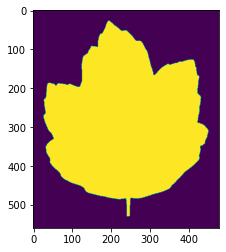

In [13]:
plt.imshow(plt.imread("./Dataset/images/1002.jpg"))

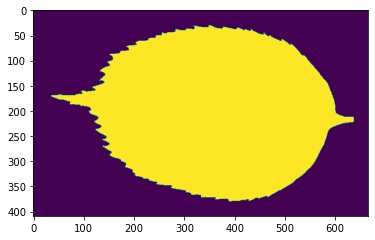

In [14]:
plt.imshow(plt.imread("./Dataset/images/100.jpg"))

In [112]:
df = pd.read_csv('./Dataset/train.csv', index_col=False)
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [113]:
df.shape

(990, 194)

In [114]:
df['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [115]:
df['species'].unique().shape

(99,)

In [116]:
df2 = pd.read_csv('./Dataset/test.csv', index_col=False)

In [35]:
df2.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [36]:
df2.shape

(594, 193)

In [42]:
df3 = df2.sample(n=248)
df3.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
331,890,0.011719,0.013672,0.087891,0.001953,0.003906,0.031250,0.033203,0.003906,0.000000,...,0.035156,0.0,0.016602,0.002930,0.026367,0.000000,0.0,0.000000,0.000000,0.022461
182,472,0.003906,0.000000,0.035156,0.052734,0.068359,0.000000,0.013672,0.000000,0.011719,...,0.000000,0.0,0.000000,0.067383,0.040039,0.026367,0.0,0.074219,0.000000,0.000000
237,607,0.000000,0.001953,0.015625,0.011719,0.033203,0.003906,0.021484,0.000000,0.009766,...,0.029297,0.0,0.000977,0.001953,0.026367,0.000000,0.0,0.001953,0.039062,0.029297
462,1227,0.039062,0.142580,0.019531,0.003906,0.000000,0.099609,0.009766,0.000000,0.011719,...,0.084961,0.0,0.061523,0.000000,0.005859,0.000000,0.0,0.000000,0.000977,0.010742
475,1264,0.033203,0.060547,0.007812,0.027344,0.000000,0.123050,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.032227,0.006836,0.028320,0.0,0.009766,0.036133,0.000000


In [43]:
df3.shape

(248, 193)

In [44]:
df3['id'].unique().shape

(248,)

In [45]:
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [46]:
df3

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
331,890,0.011719,0.013672,0.087891,0.001953,0.003906,0.031250,0.033203,0.003906,0.000000,...,0.035156,0.000000,0.016602,0.002930,0.026367,0.000000,0.000000,0.000000,0.000000,0.022461
182,472,0.003906,0.000000,0.035156,0.052734,0.068359,0.000000,0.013672,0.000000,0.011719,...,0.000000,0.000000,0.000000,0.067383,0.040039,0.026367,0.000000,0.074219,0.000000,0.000000
237,607,0.000000,0.001953,0.015625,0.011719,0.033203,0.003906,0.021484,0.000000,0.009766,...,0.029297,0.000000,0.000977,0.001953,0.026367,0.000000,0.000000,0.001953,0.039062,0.029297
462,1227,0.039062,0.142580,0.019531,0.003906,0.000000,0.099609,0.009766,0.000000,0.011719,...,0.084961,0.000000,0.061523,0.000000,0.005859,0.000000,0.000000,0.000000,0.000977,0.010742
475,1264,0.033203,0.060547,0.007812,0.027344,0.000000,0.123050,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.032227,0.006836,0.028320,0.000000,0.009766,0.036133,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1495,0.007812,0.015625,0.058594,0.023438,0.027344,0.013672,0.056641,0.003906,0.009766,...,0.000000,0.000000,0.001953,0.000977,0.000000,0.000000,0.000000,0.001953,0.000000,0.006836
480,1279,0.003906,0.005859,0.072266,0.003906,0.019531,0.000000,0.023438,0.000000,0.005859,...,0.038086,0.000000,0.052734,0.001953,0.022461,0.000000,0.000000,0.000977,0.002930,0.013672
428,1139,0.039062,0.078125,0.007812,0.001953,0.001953,0.103520,0.001953,0.000000,0.007812,...,0.000000,0.000000,0.017578,0.021484,0.043945,0.000000,0.000000,0.008789,0.020508,0.016602
225,579,0.015625,0.015625,0.085938,0.029297,0.003906,0.013672,0.013672,0.000000,0.005859,...,0.000000,0.000000,0.000000,0.145510,0.022461,0.000977,0.000000,0.150390,0.000000,0.000000


In [47]:
Species_Image = pd.DataFrame({'Id': range(1,991), 'Species': df.species})

In [48]:
Species_Image

,Id,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,4,Tilia_Tomentosa
4,5,Quercus_Variabilis
...,...,...
985,986,Magnolia_Salicifolia
986,987,Acer_Pictum
987,988,Alnus_Maximowiczii
988,989,Quercus_Rubra


In [49]:
df['id']

0         1
1         2
2         3
3         5
4         6
       ... 
985    1575
986    1578
987    1581
988    1582
989    1584
Name: id, Length: 990, dtype: int64

In [50]:
df3['id']

331     890
182     472
237     607
462    1227
475    1264
       ... 
565    1495
480    1279
428    1139
225     579
267     688
Name: id, Length: 248, dtype: int64

In [67]:
id_train = (list(df['id']))

In [68]:
id_train

[1,
 2,
 3,
 5,
 6,
 8,
 10,
 11,
 14,
 15,
 17,
 18,
 20,
 21,
 22,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 42,
 43,
 45,
 48,
 49,
 50,
 54,
 55,
 56,
 58,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 71,
 72,
 73,
 75,
 76,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 92,
 100,
 101,
 103,
 106,
 107,
 108,
 109,
 115,
 116,
 118,
 120,
 122,
 124,
 127,
 129,
 130,
 132,
 133,
 134,
 139,
 140,
 142,
 143,
 145,
 146,
 148,
 149,
 152,
 153,
 155,
 160,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 173,
 175,
 178,
 179,
 183,
 186,
 188,
 189,
 190,
 194,
 196,
 198,
 199,
 201,
 202,
 203,
 204,
 206,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 219,
 224,
 225,
 227,
 228,
 231,
 233,
 235,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 245,
 246,
 247,
 248,
 249,
 252,
 253,
 256,
 257,
 258,
 259,
 260,
 262,
 263,
 265,
 267,
 268,
 269,
 270,
 273,
 275,
 278,
 280,
 282,
 283,
 286,
 288,
 289,
 290,
 291,
 294,
 298,
 302,
 303,
 304,
 306,
 307,
 309,
 310,
 31

In [69]:
id_test = (list(df3['id']))

In [72]:
id_test.sort()

In [73]:
id_test

[7,
 12,
 13,
 19,
 23,
 36,
 46,
 47,
 59,
 70,
 74,
 86,
 89,
 90,
 91,
 93,
 97,
 98,
 105,
 117,
 119,
 121,
 123,
 131,
 137,
 138,
 141,
 144,
 156,
 159,
 170,
 172,
 184,
 187,
 191,
 192,
 197,
 200,
 209,
 213,
 221,
 229,
 234,
 236,
 244,
 250,
 251,
 254,
 261,
 271,
 277,
 285,
 300,
 301,
 313,
 316,
 320,
 332,
 337,
 343,
 346,
 347,
 351,
 352,
 370,
 373,
 381,
 384,
 391,
 395,
 400,
 403,
 405,
 414,
 422,
 434,
 439,
 442,
 447,
 472,
 476,
 479,
 486,
 500,
 533,
 536,
 540,
 544,
 546,
 554,
 555,
 557,
 567,
 578,
 579,
 580,
 583,
 584,
 594,
 604,
 607,
 608,
 611,
 612,
 638,
 640,
 650,
 665,
 666,
 670,
 674,
 686,
 688,
 691,
 701,
 702,
 703,
 708,
 719,
 735,
 736,
 739,
 744,
 746,
 773,
 775,
 781,
 783,
 790,
 791,
 795,
 814,
 817,
 830,
 833,
 834,
 857,
 872,
 887,
 889,
 890,
 891,
 913,
 925,
 929,
 930,
 935,
 945,
 950,
 953,
 957,
 964,
 965,
 977,
 991,
 998,
 1009,
 1012,
 1018,
 1033,
 1038,
 1043,
 1045,
 1047,
 1053,
 1054,
 1058,
 1067,

In [74]:
ids = id_test + id_train

In [76]:
ids.sort()

In [77]:
ids

[1,
 2,
 3,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 97,
 98,
 100,
 101,
 103,
 105,
 106,
 107,
 108,
 109,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 152,
 153,
 155,
 156,
 159,
 160,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 178,
 179,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 206,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 221,
 224,
 225,
 227,
 228,
 229,
 231,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242

In [78]:
len(ids)

1238

In [81]:
set(ids)

{1,
 2,
 3,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 97,
 98,
 100,
 101,
 103,
 105,
 106,
 107,
 108,
 109,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 152,
 153,
 155,
 156,
 159,
 160,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 178,
 179,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 206,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 221,
 224,
 225,
 227,
 228,
 229,
 231,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242

In [82]:
len(set(ids))

1238

In [83]:
Species_Table = pd.DataFrame({'Id': df.id, 'Species': df.species}) 
Species_Table

,Id,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


In [93]:
# for Training Dataset
for img_filename in os.listdir('./Dataset/images'):
    a = int(img_filename.split('.')[0])
    if(a in id_train):
        print(a)
        imgsav = imread('./Dataset/images/' + img_filename)
        path = './/Augumented Data//Train'
        cv2.imwrite(os.path.join(path, img_filename), imgsav)

1
10
100
1000
1001
1002
1003
1004
1005
1006
1007
101
1010
1011
1013
1014
1016
1017
1019
1021
1023
1024
1025
1027
103
1030
1031
1032
1034
1036
1037
1039
1040
1041
1042
1046
1048
1049
1051
1052
1056
1059
106
1061
1062
1065
1066
107
1072
1073
1076
1077
108
1080
1081
1083
1085
1087
1088
1089
109
1090
1093
1094
1095
1096
1097
1098
11
1100
1101
1110
1112
1113
1117
1118
1119
1120
1121
1123
1124
1125
1128
1130
1131
1132
1134
1135
1136
1142
1144
1145
1147
1148
115
1152
1153
1154
1156
1157
1159
116
1160
1163
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1179
118
1180
1182
1184
1186
1187
1194
1196
1197
1198
120
1200
1201
1202
1205
1206
1208
1210
1211
1213
1216
1217
1218
1219
122
1220
1221
1222
1223
1225
1226
1228
1229
1231
1232
1235
1236
1238
1239
124
1240
1242
1243
1244
1245
1249
1250
1251
1253
1254
1255
1256
1257
1258
1262
1263
1265
1268
1269
127
1270
1271
1273
1275
1276
1277
1278
1281
1282
1283
1284
1286
1287
1289
129
1291
1292
1294
1296
1299
130
1300
1301
1302
1305
1308
1309
131

In [94]:
len(os.listdir('./Augumented Data/Train'))

990

In [95]:
# for Testing Dataset
for img_filename in os.listdir('./Dataset/images'):
    a = int(img_filename.split('.')[0])
    if(a in id_test):
        print(a)
        imgsav = imread('./Dataset/images/' + img_filename)
        path = './/Augumented Data//Test'
        cv2.imwrite(os.path.join(path, img_filename), imgsav)

1009
1012
1018
1033
1038
1043
1045
1047
105
1053
1054
1058
1067
1068
1069
1070
1082
1086
1092
1102
1105
1107
1108
1109
1111
1116
1126
1129
1133
1138
1139
1140
1141
1143
1151
1158
1161
1162
117
1178
1181
1185
119
1195
12
1209
121
1212
1227
123
1230
1233
1246
1247
1248
1264
1267
1272
1279
1285
1293
1297
1298
13
1303
1304
1306
1307
131
1314
1338
1364
1369
137
1371
138
1387
1400
141
1412
1434
144
1445
1451
1453
1455
1462
1466
1470
1485
1486
1495
1510
1513
1517
1526
1528
1534
1535
1537
1553
156
1565
1579
1583
159
170
172
184
187
19
191
192
197
200
209
213
221
229
23
234
236
244
250
251
254
261
271
277
285
300
301
313
316
320
332
337
343
346
347
351
352
36
370
373
381
384
391
395
400
403
405
414
422
434
439
442
447
46
47
472
476
479
486
500
533
536
540
544
546
554
555
557
567
578
579
580
583
584
59
594
604
607
608
611
612
638
640
650
665
666
670
674
686
688
691
7
70
701
702
703
708
719
735
736
739
74
744
746
773
775
781
783
790
791
795
814
817
830
833
834
857
86
872
887
889
89
890
891
90
91


In [96]:
len(os.listdir('./Augumented Data/Test'))

248

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [99]:
# for Data Dataset
count = 1 
for img_filename in os.listdir('./Dataset/images'):
    a = int(img_filename.split('.')[0])
    if(a in id_train):
        print(a)
        imgsav = imread('./Dataset/images/' + img_filename)
        path = './/Augumented Data//Data'
        cv2.imwrite(os.path.join(path, str(count) + '.jpg'), imgsav)
        count = count + 1

1
10
100
1000
1001
1002
1003
1004
1005
1006
1007
101
1010
1011
1013
1014
1016
1017
1019
1021
1023
1024
1025
1027
103
1030
1031
1032
1034
1036
1037
1039
1040
1041
1042
1046
1048
1049
1051
1052
1056
1059
106
1061
1062
1065
1066
107
1072
1073
1076
1077
108
1080
1081
1083
1085
1087
1088
1089
109
1090
1093
1094
1095
1096
1097
1098
11
1100
1101
1110
1112
1113
1117
1118
1119
1120
1121
1123
1124
1125
1128
1130
1131
1132
1134
1135
1136
1142
1144
1145
1147
1148
115
1152
1153
1154
1156
1157
1159
116
1160
1163
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1179
118
1180
1182
1184
1186
1187
1194
1196
1197
1198
120
1200
1201
1202
1205
1206
1208
1210
1211
1213
1216
1217
1218
1219
122
1220
1221
1222
1223
1225
1226
1228
1229
1231
1232
1235
1236
1238
1239
124
1240
1242
1243
1244
1245
1249
1250
1251
1253
1254
1255
1256
1257
1258
1262
1263
1265
1268
1269
127
1270
1271
1273
1275
1276
1277
1278
1281
1282
1283
1284
1286
1287
1289
129
1291
1292
1294
1296
1299
130
1300
1301
1302
1305
1308
1309
131

In [102]:
Species_Image

,Id,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,4,Tilia_Tomentosa
4,5,Quercus_Variabilis
...,...,...
985,986,Magnolia_Salicifolia
986,987,Acer_Pictum
987,988,Alnus_Maximowiczii
988,989,Quercus_Rubra


In [103]:
Species_Image['id'] = 965

In [108]:
Species_Image = Species_Image.drop('id', axis=1)

In [110]:
Species_Image[960:]

,Id,Species
960,961,Quercus_Vulcanica
961,962,Salix_Fragilis
962,963,Tilia_Tomentosa
963,964,Populus_Grandidentata
964,965,Prunus_X_Shmittii
965,966,Quercus_x_Hispanica
966,967,Quercus_Suber
967,968,Alnus_Viridis
968,969,Acer_Palmatum
969,970,Quercus_Rhysophylla


In [111]:
Species_Image.to_csv("./Augumented Data/Species_Data.csv")

In [117]:
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [126]:
new_df = df[['id', 'species', 'new_id']]

In [123]:
df['new_id'] = range(1,991)

In [127]:
new_df

,id,species,new_id
0,1,Acer_Opalus,1
1,2,Pterocarya_Stenoptera,2
2,3,Quercus_Hartwissiana,3
3,5,Tilia_Tomentosa,4
4,6,Quercus_Variabilis,5
...,...,...,...
985,1575,Magnolia_Salicifolia,986
986,1578,Acer_Pictum,987
987,1581,Alnus_Maximowiczii,988
988,1582,Quercus_Rubra,989


In [128]:
new_df.to_csv('Species_Data.csv')

In [129]:
l1 = os.listdir('./Dataset/images')

In [130]:
l1

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '101.jpg',
 '1010.jpg',
 '1011.jpg',
 '1012.jpg',
 '1013.jpg',
 '1014.jpg',
 '1015.jpg',
 '1016.jpg',
 '1017.jpg',
 '1018.jpg',
 '1019.jpg',
 '102.jpg',
 '1020.jpg',
 '1021.jpg',
 '1022.jpg',
 '1023.jpg',
 '1024.jpg',
 '1025.jpg',
 '1026.jpg',
 '1027.jpg',
 '1028.jpg',
 '1029.jpg',
 '103.jpg',
 '1030.jpg',
 '1031.jpg',
 '1032.jpg',
 '1033.jpg',
 '1034.jpg',
 '1035.jpg',
 '1036.jpg',
 '1037.jpg',
 '1038.jpg',
 '1039.jpg',
 '104.jpg',
 '1040.jpg',
 '1041.jpg',
 '1042.jpg',
 '1043.jpg',
 '1044.jpg',
 '1045.jpg',
 '1046.jpg',
 '1047.jpg',
 '1048.jpg',
 '1049.jpg',
 '105.jpg',
 '1050.jpg',
 '1051.jpg',
 '1052.jpg',
 '1053.jpg',
 '1054.jpg',
 '1055.jpg',
 '1056.jpg',
 '1057.jpg',
 '1058.jpg',
 '1059.jpg',
 '106.jpg',
 '1060.jpg',
 '1061.jpg',
 '1062.jpg',
 '1063.jpg',
 '1064.jpg',
 '1065.jpg',
 '1066.jpg',
 '1067.jpg',
 '1068.jpg'

In [131]:
l2 = list(new_df['id'])

In [132]:
l2

[1,
 2,
 3,
 5,
 6,
 8,
 10,
 11,
 14,
 15,
 17,
 18,
 20,
 21,
 22,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 42,
 43,
 45,
 48,
 49,
 50,
 54,
 55,
 56,
 58,
 60,
 61,
 63,
 64,
 66,
 67,
 69,
 71,
 72,
 73,
 75,
 76,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 92,
 100,
 101,
 103,
 106,
 107,
 108,
 109,
 115,
 116,
 118,
 120,
 122,
 124,
 127,
 129,
 130,
 132,
 133,
 134,
 139,
 140,
 142,
 143,
 145,
 146,
 148,
 149,
 152,
 153,
 155,
 160,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 173,
 175,
 178,
 179,
 183,
 186,
 188,
 189,
 190,
 194,
 196,
 198,
 199,
 201,
 202,
 203,
 204,
 206,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 219,
 224,
 225,
 227,
 228,
 231,
 233,
 235,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 245,
 246,
 247,
 248,
 249,
 252,
 253,
 256,
 257,
 258,
 259,
 260,
 262,
 263,
 265,
 267,
 268,
 269,
 270,
 273,
 275,
 278,
 280,
 282,
 283,
 286,
 288,
 289,
 290,
 291,
 294,
 298,
 302,
 303,
 304,
 306,
 307,
 309,
 310,
 31

In [133]:
l2[989]

1584

In [134]:
l3 = list(new_df['new_id'])

In [135]:
l3

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [139]:
l3[989]

990

AttributeError: 'list' object has no attribute 'datatype'

In [143]:
# for Data Dataset
for i in range(0,990):
    print(i)
    imgsav = imread('./Dataset/images/' + str(l2[i]) + '.jpg')
    path = './/Augumented Data//Data'
    cv2.imwrite(os.path.join(path, str(l3[i]) + '.jpg'), imgsav)
    count = count + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [152]:
image_generator_1 = ImageDataGenerator(horizontal_flip=True)


In [153]:
count = 991
for i in range(1, 991):
    image_filename = str(i) + '.jpg'
    leaf_img_path = './Augumented Data/Data/' + image_filename
    leaf_img = imread(leaf_img_path)
    imgsav = image_generator_1.random_transform(leaf_img)
    path = './Augumented Data/Data'
    image_filename = str(count) + '.jpg'
    cv2.imwrite(os.path.join(path, image_filename), imgsav)
    count = count + 1

In [158]:
image_generator_2 = ImageDataGenerator(vertical_flip=True)

In [160]:
count = 1981
for i in range(1, 991):
    image_filename = str(i) + '.jpg'
    leaf_img_path = './Augumented Data/Data/' + image_filename
    leaf_img = imread(leaf_img_path)
    imgsav = image_generator_2.random_transform(leaf_img)
    path = './Augumented Data/Data'
    image_filename = str(count) + '.jpg'
    cv2.imwrite(os.path.join(path, image_filename), imgsav)
    count = count + 1

In [168]:
image_generator_3 = ImageDataGenerator(vertical_flip=True, horizontal_flip=True)

In [169]:
count = 2971
for i in range(1, 991):
    image_filename = str(i) + '.jpg'
    leaf_img_path = './Augumented Data/Data/' + image_filename
    leaf_img = imread(leaf_img_path)
    imgsav = image_generator_3.random_transform(leaf_img)
    path = './Augumented Data/Data'
    image_filename = str(count) + '.jpg'
    cv2.imwrite(os.path.join(path, image_filename), imgsav)
    count = count + 1

In [181]:
new_df2 = new_df[['new_id', 'species']]

In [188]:
new_df2 = new_df2.rename(columns = {'new_id': 'ID', 'species' : 'Species'})
new_df2

,ID,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,4,Tilia_Tomentosa
4,5,Quercus_Variabilis
...,...,...
985,986,Magnolia_Salicifolia
986,987,Acer_Pictum
987,988,Alnus_Maximowiczii
988,989,Quercus_Rubra


In [189]:
species_1 = pd.DataFrame({'ID': range(991, 1981), 'Species': df.species})
species_1

,ID,Species
0,991,Acer_Opalus
1,992,Pterocarya_Stenoptera
2,993,Quercus_Hartwissiana
3,994,Tilia_Tomentosa
4,995,Quercus_Variabilis
...,...,...
985,1976,Magnolia_Salicifolia
986,1977,Acer_Pictum
987,1978,Alnus_Maximowiczii
988,1979,Quercus_Rubra


In [190]:
species_2 = pd.DataFrame({'ID': range(1981, 2971), 'Species': df.species})
species_2

,ID,Species
0,1981,Acer_Opalus
1,1982,Pterocarya_Stenoptera
2,1983,Quercus_Hartwissiana
3,1984,Tilia_Tomentosa
4,1985,Quercus_Variabilis
...,...,...
985,2966,Magnolia_Salicifolia
986,2967,Acer_Pictum
987,2968,Alnus_Maximowiczii
988,2969,Quercus_Rubra


In [191]:
species_3 = pd.DataFrame({'ID': range(2971, 3961), 'Species': df.species})
species_3

,ID,Species
0,2971,Acer_Opalus
1,2972,Pterocarya_Stenoptera
2,2973,Quercus_Hartwissiana
3,2974,Tilia_Tomentosa
4,2975,Quercus_Variabilis
...,...,...
985,3956,Magnolia_Salicifolia
986,3957,Acer_Pictum
987,3958,Alnus_Maximowiczii
988,3959,Quercus_Rubra


In [192]:
new_df2 = pd.concat([new_df2, species_1, species_2, species_3])
new_df2

,ID,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,4,Tilia_Tomentosa
4,5,Quercus_Variabilis
...,...,...
985,3956,Magnolia_Salicifolia
986,3957,Acer_Pictum
987,3958,Alnus_Maximowiczii
988,3959,Quercus_Rubra


In [197]:
new_df2.reset_index(drop=True)

,index,ID,Species
0,0,1,Acer_Opalus
1,1,2,Pterocarya_Stenoptera
2,2,3,Quercus_Hartwissiana
3,3,4,Tilia_Tomentosa
4,4,5,Quercus_Variabilis
...,...,...,...
3955,985,3956,Magnolia_Salicifolia
3956,986,3957,Acer_Pictum
3957,987,3958,Alnus_Maximowiczii
3958,988,3959,Quercus_Rubra


In [201]:
new_df2.drop('index', axis=1, inplace=True)

KeyError: "['index'] not found in axis"

In [202]:
new_df2

,ID,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,4,Tilia_Tomentosa
4,5,Quercus_Variabilis
...,...,...
3955,3956,Magnolia_Salicifolia
3956,3957,Acer_Pictum
3957,3958,Alnus_Maximowiczii
3958,3959,Quercus_Rubra


In [203]:
new_df2.to_csv('./Augumented Data/Species_Data_2.csv')